In [1]:
# cnn model
import keras
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets

import sys
sys.path.insert(0,'..')

Using TensorFlow backend.


### Read the train & test and preprocessing

In [2]:
#Load the data, split into training/testing groups
d=datasets.load_iris()
X=d.data
Y=d.target

x_train, x_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.3, shuffle= True)
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test
# The known number of output classes.
num_classes = len(np.unique(y_train))
# Input image dimensions
input_shape = (X.shape[1],)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], X.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], X.shape[1],1)

### Creation structure of CNN

In [3]:
# build CNN
def CNN_net():
    model = Sequential()
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1],1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(X.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
           
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

In [4]:
# Parametres
verbose, epochs, batch_size = 1, 200, 32
# initialize the model object
clf_cnn = CNN_net()
# fit network
history = clf_cnn.fit(x_train, y_train_binary, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test_binary))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 105 samples, validate on 45 samples
Epoch 1/200
105/105 [==============================] - 0s 3ms/step - loss: 2.2891 - accuracy: 0.4286 - val_loss: 1.1987 - val_accuracy: 0.3778
Epoch 2/200
105/105 [==============================] - 0s 16us/step - loss: 2.0019 - accuracy: 0.3810 - val_loss: 1.0588 - val_accuracy: 0.3778
Epoch 3/200
105/105 [==============================] - 0s 234us/step - loss: 1.8075 - accuracy: 0.3810 - val_loss: 0.9751 - val_accuracy: 0.3778
Epoch 4/200
105/105 [==============================] - 0s 152us/step - loss: 2.0045 - accuracy: 0.3524 - val_loss: 0.9289 - val_accuracy: 0.3778
Epoch 5/200
105/105 [==============================] - 0s 133us/step - loss: 1.5694 - accuracy: 0.4000 - val_loss: 0.9261 - val_accuracy: 0.7111
Epoch 6/200
105/105 [==============================] - 0s 123us/step - loss: 1.4460 - accuracy: 0.4476 - val_loss: 0.9389 - val_accuracy: 0.6222
Epoch

105/105 [==============================] - 0s 142us/step - loss: 0.9313 - accuracy: 0.5333 - val_loss: 0.8267 - val_accuracy: 0.6222
Epoch 52/200
105/105 [==============================] - 0s 142us/step - loss: 0.9560 - accuracy: 0.5333 - val_loss: 0.8203 - val_accuracy: 0.6222
Epoch 53/200
105/105 [==============================] - 0s 152us/step - loss: 0.8278 - accuracy: 0.5429 - val_loss: 0.8138 - val_accuracy: 0.6222
Epoch 54/200
105/105 [==============================] - 0s 152us/step - loss: 0.9441 - accuracy: 0.5143 - val_loss: 0.8068 - val_accuracy: 0.6222
Epoch 55/200
105/105 [==============================] - 0s 123us/step - loss: 0.9357 - accuracy: 0.5333 - val_loss: 0.8008 - val_accuracy: 0.6222
Epoch 56/200
105/105 [==============================] - 0s 114us/step - loss: 0.8441 - accuracy: 0.5333 - val_loss: 0.7950 - val_accuracy: 0.6222
Epoch 57/200
105/105 [==============================] - 0s 123us/step - loss: 0.8187 - accuracy: 0.5810 - val_loss: 0.7877 - val_accuracy

Epoch 107/200
105/105 [==============================] - 0s 133us/step - loss: 0.9249 - accuracy: 0.4762 - val_loss: 0.6839 - val_accuracy: 0.6889
Epoch 108/200
105/105 [==============================] - 0s 133us/step - loss: 0.8055 - accuracy: 0.5429 - val_loss: 0.6895 - val_accuracy: 0.6667
Epoch 109/200
105/105 [==============================] - 0s 123us/step - loss: 0.8438 - accuracy: 0.5905 - val_loss: 0.6880 - val_accuracy: 0.6667
Epoch 110/200
105/105 [==============================] - 0s 104us/step - loss: 0.8125 - accuracy: 0.5429 - val_loss: 0.6882 - val_accuracy: 0.6889
Epoch 111/200
105/105 [==============================] - 0s 104us/step - loss: 0.7895 - accuracy: 0.5714 - val_loss: 0.6889 - val_accuracy: 0.6889
Epoch 112/200
105/105 [==============================] - 0s 114us/step - loss: 0.7967 - accuracy: 0.5619 - val_loss: 0.6876 - val_accuracy: 0.6889
Epoch 113/200
105/105 [==============================] - 0s 114us/step - loss: 0.8224 - accuracy: 0.5048 - val_loss: 0

Epoch 163/200
105/105 [==============================] - 0s 133us/step - loss: 0.8099 - accuracy: 0.5238 - val_loss: 0.6106 - val_accuracy: 0.9556
Epoch 164/200
105/105 [==============================] - 0s 123us/step - loss: 0.7836 - accuracy: 0.5619 - val_loss: 0.6073 - val_accuracy: 0.9556
Epoch 165/200
105/105 [==============================] - 0s 123us/step - loss: 0.8547 - accuracy: 0.4476 - val_loss: 0.6042 - val_accuracy: 0.9556
Epoch 166/200
105/105 [==============================] - 0s 123us/step - loss: 0.7665 - accuracy: 0.5524 - val_loss: 0.6034 - val_accuracy: 0.9556
Epoch 167/200
105/105 [==============================] - 0s 123us/step - loss: 0.7892 - accuracy: 0.5143 - val_loss: 0.6010 - val_accuracy: 0.9778
Epoch 168/200
105/105 [==============================] - 0s 123us/step - loss: 0.7283 - accuracy: 0.5905 - val_loss: 0.5975 - val_accuracy: 0.9778
Epoch 169/200
105/105 [==============================] - 0s 123us/step - loss: 0.8230 - accuracy: 0.5048 - val_loss: 0

In [5]:
# call predict to get predictions Report the accuracy
clf_cnn.evaluate(x_test, y_test_binary)

45/45 [==============================] - 0s 155us/step


[0.5636949923303393, 0.9777777791023254]

In [6]:
# call predict to get predictions
y_pred = clf_cnn.predict(x_test)
y_pred = np.round(y_pred)
from sklearn.metrics import accuracy_score
# Report the accuracy
accuracy_CNN = accuracy_score(y_test_binary, y_pred)
print("CNN : Accuracy: " + str(accuracy_CNN))

CNN : Accuracy: 0.5333333333333333


In [7]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 64)             256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                

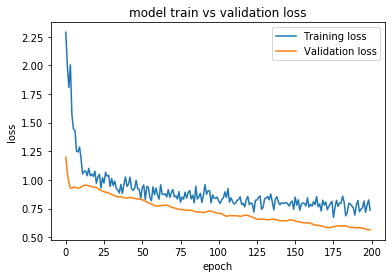

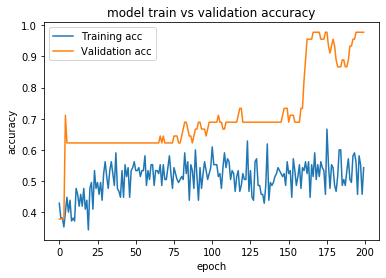

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training acc','Validation acc'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [9]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [10]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [11]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape)

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape)

Training Features (from CNN) Shape: (105, 4)
Training Labels (from CNN) Shape: (105,)
Test Features (from CNN) Shape: (45, 4)
Test Labels (from CNN) Shape: (45,)


### Classification by CNN + Random Forest + MLP

In [12]:
from djinn import djinn

print("djinn iris")    
modelname="class_djinn_iris"   # name the model
ntrees=4                 # number of trees = number of neural nets in ensemble
maxdepth=4              # max depth of tree -- optimize this for each data set
dropout_keep=1.0 

#initialize the model
model=djinn.DJINN_Classifier(ntrees,maxdepth,dropout_keep)


x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test 


# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior

# optimal=model.get_hyperparameters(x_train, y_train, random_state=1)
# batchsize=optimal['batch_size']
# learnrate=optimal['learn_rate']
# epochs=optimal['epochs']
epochs=100
learnrate=0.003
batchsize=4


# epochs=200
# learnrate=0.003
# batchsize=32
# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time
# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

import sklearn
#evaluate results
acc=sklearn.metrics.accuracy_score(y_test,m.flatten())  
#close model 
model.close_model()

djinn iris




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





Epoch: 0001 cost= 1.139275020 accuracy= 0.319
Epoch: 0002 cost= 1.030144590 accuracy= 0.702
Epoch: 0003 cost= 0.882966433 accuracy= 0.702
Epoch: 0004 cost= 0.819551573 accuracy= 0.702
Epoch: 0005 cost= 0.636414911 accuracy= 0.702
Epoch: 0006 cost= 0.553952935 accuracy= 0.734
Epoch: 0007 cost= 0.477794142 accur

Epoch: 0032 cost= 0.124360440 accuracy= 0.957
Epoch: 0033 cost= 0.126530929 accuracy= 0.957
Epoch: 0034 cost= 0.092132464 accuracy= 0.957
Epoch: 0035 cost= 0.196181155 accuracy= 0.968
Epoch: 0036 cost= 0.155943486 accuracy= 0.957
Epoch: 0037 cost= 0.170674213 accuracy= 0.926
Epoch: 0038 cost= 0.131505125 accuracy= 0.947
Epoch: 0039 cost= 0.235400666 accuracy= 0.957
Epoch: 0040 cost= 0.223506759 accuracy= 0.968
Epoch: 0041 cost= 0.167915069 accuracy= 0.957
Epoch: 0042 cost= 0.160074616 accuracy= 0.968
Epoch: 0043 cost= 0.183080039 accuracy= 0.968
Epoch: 0044 cost= 0.124504805 accuracy= 0.968
Epoch: 0045 cost= 0.072514121 accuracy= 0.968
Epoch: 0046 cost= 0.118929792 accuracy= 0.957
Epoch: 0047 cost= 0.142008648 accuracy= 0.957
Epoch: 0048 cost= 0.134258813 accuracy= 0.968
Epoch: 0049 cost= 0.093354852 accuracy= 0.957
Epoch: 0050 cost= 0.077894829 accuracy= 0.957
Epoch: 0051 cost= 0.161406583 accuracy= 0.957
Epoch: 0052 cost= 0.076903980 accuracy= 0.968
Epoch: 0053 cost= 0.111251411 accu

Epoch: 0008 cost= 0.455744130 accuracy= 0.809
Epoch: 0009 cost= 0.360339127 accuracy= 0.947
Epoch: 0010 cost= 0.368134620 accuracy= 0.947
Epoch: 0011 cost= 0.276480319 accuracy= 0.947
Epoch: 0012 cost= 0.247436343 accuracy= 0.947
Epoch: 0013 cost= 0.232407177 accuracy= 0.957
Epoch: 0014 cost= 0.213800216 accuracy= 0.957
Epoch: 0015 cost= 0.164385952 accuracy= 0.957
Epoch: 0016 cost= 0.131779069 accuracy= 0.957
Epoch: 0017 cost= 0.170822611 accuracy= 0.947
Epoch: 0018 cost= 0.156570866 accuracy= 0.957
Epoch: 0019 cost= 0.095285002 accuracy= 0.947
Epoch: 0020 cost= 0.234423677 accuracy= 0.957
Epoch: 0021 cost= 0.116171166 accuracy= 0.957
Epoch: 0022 cost= 0.091995094 accuracy= 0.957
Epoch: 0023 cost= 0.110754827 accuracy= 0.957
Epoch: 0024 cost= 0.070247406 accuracy= 0.957
Epoch: 0025 cost= 0.089888264 accuracy= 0.957
Epoch: 0026 cost= 0.072011476 accuracy= 0.957
Epoch: 0027 cost= 0.152110973 accuracy= 0.957
Epoch: 0028 cost= 0.147893822 accuracy= 0.957
Epoch: 0029 cost= 0.124959883 accu

### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [13]:
#Feed the extracted features with the labels to RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(out_cnn_train, y_train)
#Feed the features of the test to Random Forest Classifier to predict its class
predictions = rf.predict(out_cnn_test)
accuracy_CNN_RF=accuracy_score(predictions , y_test)
#print('CNN+RF : Accuracy:', accuracy_CNN_RF, '%.')

from sklearn.ensemble import ExtraTreesClassifier
Ext = ExtraTreesClassifier(n_estimators=100)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictions = Ext.predict(out_cnn_test)
accuracy_CNN_Ext=accuracy_score(predictions , y_test)
#print('CNN+Extrat : Accuracy:', accuracy_CNN_Ext, '%.')


#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(out_cnn_train, y_train)
#print('The accuracy of the SVM classifier on training data is {:.4f}'.format(svm.score(x_train, y_train)))


#Applying XGBoost
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(out_cnn_train, y_train)
#print('The accuracy of the XGBoost classifier on training data is {:.4f}'.format(xgb_clf.score(x_train, y_train)))


#Applying Decision Tree
from sklearn import tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier()
#Train DT based on scaled training set
decision_tree.fit(out_cnn_train, y_train)
#Print performance
#print('The accuracy of the Decision Tree classifier on training data is {:.4f}'.format(decision_tree.score(x_train, y_train)))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with the best KNN model
# This will allow us to get a better results
cx_train = np.concatenate((x_train, x_test), 0)
cy_train = np.concatenate((y_train, y_test), 0)

### Classification by RandomForest, ExtraTrees

In [15]:
# RandomForestClassifier : from dataset originl
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
accuracy_RF=accuracy_score(predictions , y_test_)
#print('RF : Accuracy:', accuracy_RF, '%.')

# ExtraTreesClassifier : from dataset originl
Extra = ExtraTreesClassifier(n_estimators=100)
Extra.fit(x_train_, y_train_)
predictions = Extra.predict(x_test_)
accuracy_Extra=accuracy_score(predictions , y_test_)
#print('Extra : Accuracy:', accuracy_Extra, '%.')

###  Score

In [16]:
print('Accuracy RF          ::',  "{:.4f}".format(accuracy_RF),'%.')
print('Accuracy Extrat      ::',  "{:.4f}".format(accuracy_Extra),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN         ::',  "{:.4f}".format(accuracy_CNN), '%.')
print('Accuracy CNN+RF      ::',  "{:.4f}".format(accuracy_CNN_RF), '%.')
print('Accuracy CNN+Extrat  ::',  "{:.4f}".format(accuracy_CNN_Ext), '%.')
print('Accuracy CNN+SVM     :: {:.4f}'.format(svm.score(x_test, y_test)),'%.')
print('Accuracy CNN+XGBoost :: {:.4f}'.format(xgb_clf.score(x_test, y_test)),'%.')
print('Accuracy CNN+DTree   :: {:.4f}'.format(decision_tree.score(x_test, y_test)),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN+RF+MLP  ::',  "{:.4f}".format(acc),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN+SVM using cv=10     :: {:.4f}' .format(cross_val_score(svm, cx_train, cy_train, cv=10, scoring='accuracy').mean()),'%.')
print('Accuracy CNN+rf  using cv=10     :: {:.4f}' .format(cross_val_score(rf, cx_train, cy_train, cv=10, scoring='accuracy').mean() ),'%.')
print('Accuracy CNN+XGBoost using cv=10 :: {:.4f}'.format(cross_val_score(xgb_clf, cx_train, cy_train, cv=10, scoring='accuracy').mean() ),'%.')

Accuracy RF          :: 0.9556 %.
Accuracy Extrat      :: 0.9556 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN         :: 0.5333 %.
Accuracy CNN+RF      :: 0.9556 %.
Accuracy CNN+Extrat  :: 0.9556 %.
Accuracy CNN+SVM     :: 0.9778 %.
Accuracy CNN+XGBoost :: 0.8889 %.
Accuracy CNN+DTree   :: 0.9556 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+RF+MLP  :: 0.9556 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+SVM using cv=10     :: 0.9733 %.
Accuracy CNN+rf  using cv=10     :: 0.9733 %.
Accuracy CNN+XGBoost using cv=10 :: 0.9600 %.


In [17]:
#https://datascience.stackexchange.com/questions/38957/keras-conv1d-for-simple-data-target-prediction